In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns

In [4]:
# 17 graficos
# cada query con sus 9 algoritmos (Tradicional y los mios) para k=1000 (total computo)

In [18]:
alg_label = ["G. LOUDS Backtrack.", 
             "G. LOUDS Op. Order",
                "G. DFUDS Backtrack."]#, 
    #"G. DFUDS Op. Order",
              #  "R. LOUDS Backtrack.", "R. LOUDS Op. Order",
               # "R. DFUDS Backtrack.", "R. DFUDS Op. Order"]
queries_label = ["j3","j4","p2","p3","p4","s1","s2","s3","s4","t2","t3","t4","ti2","ti3","ti4","tr1","tr2"]
queries_title = ["J3","J4","P2","P3","P4","S1","S2","S3","S4","T2","T3","T4","Ti2","Ti3","Ti4","Tr1","Tr2"]

In [27]:
# box plots for each query
# TODO: make file j3... variable
# TDO hacer un for para cada query y función y tamaño k
data = []
# Replication with *
rows, cols = 17, 3 #9 TODO: change this
row_template = [0] * cols
data = [row_template[:] for _ in range(rows)]

for type_fun in [0]:#,1]:
    for k in [1000]: # TODO: maybe only k=1000 ? 
        for i,query in enumerate(queries_label): #[j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]:
            file = f"{query}-f{type_fun}-k{k}.txt"
            print(file)
            partialLoudsBack = np.loadtxt(f'../partial/louds/backtracking/{file}', dtype=float)
            partialLoudsNon = np.loadtxt(f'../partial/louds/backtracking/{file}', dtype=float)# np.loadtxt(f'../partial/louds/nonFixedQueue/{file}', dtype=float)
            partialDfudsBack = np.loadtxt(f'../partial/louds/backtracking/{file}', dtype=float)#np.loadtxt(f'../partial/dfuds/backtracking/{file}', dtype=float)
            #partialDfudsNon = np.loadtxt(f'../partial/louds/backtracking/{file}', dtype=float)#np.loadtxt(f'../partial/dfuds/nonFixedQueue/{file}', dtype=float)

            #rankedLoudsBack = np.loadtxt(f'../partial/louds/backtracking/{file}', dtype=float)#np.loadtxt(f'../ranked/louds/backtracking/{file}', dtype=float)
            #rankedLoudsNon = np.loadtxt(f'../partial/louds/backtracking/{file}', dtype=float)#np.loadtxt(f'../ranked/louds/nonFixedQueue/{file}', dtype=float)
            #rankedDfudsBack = np.loadtxt(f'../partial/louds/backtracking/{file}', dtype=float)#np.loadtxt(f'../ranked/dfuds/backtracking/{file}', dtype=float)
            #rankedDfudsNon = np.loadtxt(f'../partial/louds/backtracking/{file}', dtype=float)#np.loadtxt(f'../ranked/dfuds/nonFixedQueue/{file}', dtype=float)
            
            #traditional = np.loadtxt(f'../partial/louds/backtracking/{file}', dtype=float)#np.loadtxt(f'../all/{query}.txt',dtype=float)
                
            # Convertir a floats explícitamente (aunque np.loadtxt ya debería cargar como float)
            partialLoudsBack = partialLoudsBack.astype(float)
            partialLoudsNon = partialLoudsNon.astype(float)
            partialDfudsBack = partialDfudsBack.astype(float)
      
            data[i] = [partialLoudsBack, partialLoudsNon, partialDfudsBack]#, 
            #[traditional, 
            #           partialLoudsBack, partialLoudsNon, partialDfudsBack]#, 
                #partialDfudsNon, rankedLoudsBack, rankedLoudsNon, rankedDfudsBack, rankedDfudsNon]
                
            #for j,alg in enumerate(data[i]):
             #   if len(alg) < 50: # Rellenar con NaN si hay menos elementos
              #      data[i][j] = np.pad(alg, (0, 50 - len(alg)), constant_values=np.nan)
         
                        
                        
                        
                        
                        
                        

j3-f0-k1000.txt
j4-f0-k1000.txt
p2-f0-k1000.txt
p3-f0-k1000.txt
p4-f0-k1000.txt
s1-f0-k1000.txt
s2-f0-k1000.txt
s3-f0-k1000.txt
s4-f0-k1000.txt
t2-f0-k1000.txt
t3-f0-k1000.txt
t4-f0-k1000.txt
ti2-f0-k1000.txt
ti3-f0-k1000.txt
ti4-f0-k1000.txt
tr1-f0-k1000.txt
tr2-f0-k1000.txt


In [29]:
#traditional
# data [i] --> en cada fila es una query (17 rows)
# data[i][j] --> un algoritmo en cada columna (8 cols)


In [37]:
#data[0][2] = data[0][5]
data[16][2]

array([2.30540e-02, 2.83830e-02, 1.30699e-01, 4.59590e-02, 2.81930e-02,
       6.79900e-02, 8.41580e-02, 4.01810e-02, 9.89200e-03, 8.29318e-01,
       1.44010e-02, 9.38790e-02, 1.56300e-03, 6.49460e-02, 6.46980e-02,
       7.35330e-02, 1.06697e-01, 1.90772e-01, 2.31180e-02, 3.81717e+00,
       5.89820e-02, 1.92855e-01, 4.01580e-02, 1.12570e-02, 5.50050e-02,
       1.97497e-01, 6.84759e-01, 1.01550e-01, 9.69650e-02, 6.92310e-02,
       2.06990e-02, 1.34027e-01, 4.58790e-02, 4.72600e-02, 7.15610e-02,
       1.21417e+00, 2.87050e-02, 4.67200e-03, 5.50100e-02, 1.43083e-01,
       2.29566e-01, 3.86200e-03, 2.06596e-01, 2.21880e-02, 2.95900e-03,
       1.00000e-02, 5.68870e-02, 7.64510e-02, 3.35750e-02, 5.35200e-02])

In [43]:
# colors:
# https://matplotlib.org/stable/gallery/color/named_colors.html
colors = ['hotpink','red','peru']#, 'lightsalmon', 'gold', 'dodgerblue', 'darkturquoise', 'mediumspringgreen', 'lime']
colors = ['red', 'peru','lightsalmon']#, 'gold', 'dodgerblue', 'darkturquoise', 'mediumspringgreen', 'lime']


In [39]:
len(data[14][2])

45

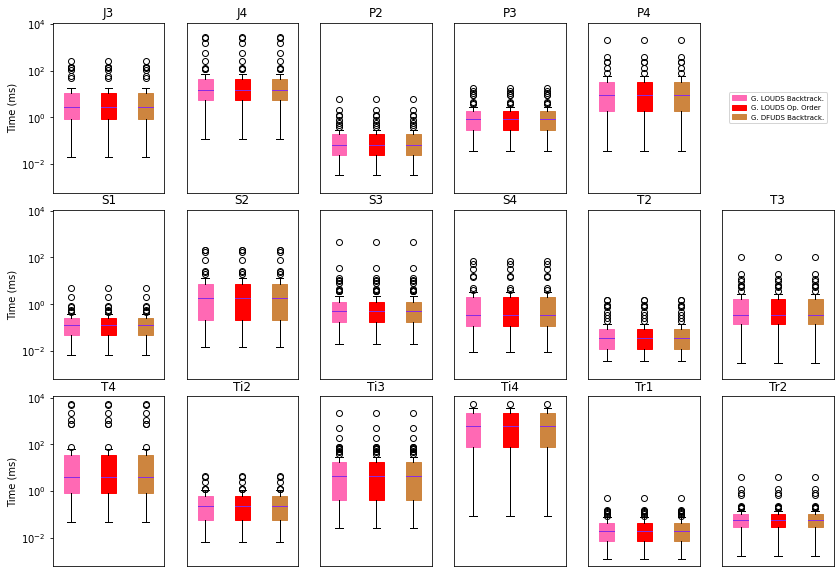

In [44]:
# Crear la figura
fig = plt.figure(figsize=(14,10))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(3, 6, figure=fig, hspace=0.1, wspace=0.2)

# Añadir los subplots a la figura
j3 = fig.add_subplot(gs[0, 0])
j4 = fig.add_subplot(gs[0, 1], sharex=j3, sharey=j3)
p2 = fig.add_subplot(gs[0, 2], sharex=j3, sharey=j3)
p3 = fig.add_subplot(gs[0, 3], sharex=j3, sharey=j3)
p4 = fig.add_subplot(gs[0, 4], sharex=j3, sharey=j3)
color_legend = fig.add_subplot(gs[0, 5]) # Space for the legend
color_legend.axis('off')  # Hide the axis

s1 = fig.add_subplot(gs[1, 0], sharex=j3, sharey=j3)
s2 = fig.add_subplot(gs[1, 1], sharex=j3, sharey=j3)
s3 = fig.add_subplot(gs[1, 2], sharex=j3, sharey=j3)
s4 = fig.add_subplot(gs[1, 3], sharex=j3, sharey=j3)
t2 = fig.add_subplot(gs[1, 4], sharex=j3, sharey=j3)
t3 = fig.add_subplot(gs[1, 5], sharex=j3, sharey=j3)

t4 = fig.add_subplot(gs[2, 0], sharex=j3, sharey=j3)
ti2 = fig.add_subplot(gs[2, 1], sharex=j3, sharey=j3)
ti3 = fig.add_subplot(gs[2, 2], sharex=j3, sharey=j3)
ti4 = fig.add_subplot(gs[2, 3], sharex=j3, sharey=j3)
tr1 = fig.add_subplot(gs[2, 4], sharex=j3, sharey=j3)
tr2 = fig.add_subplot(gs[2, 5], sharex=j3, sharey=j3)

j3.set_ylabel('Time (ms)')
s1.set_ylabel('Time (ms)')
t4.set_ylabel('Time (ms)')


for i,query in enumerate([j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]):
    for j, alg in enumerate(alg_label):
        bp = query.boxplot(data[i][j], positions=[j],whis=1, widths=0.4, patch_artist=True, 
                      boxprops=dict(facecolor=colors[j],color=colors[j], label=alg_label[j]),
                        medianprops=dict(color='blueviolet'))
    query.set_yscale('log')
    query.set_title(queries_title[i])
    query.axes.get_xaxis().set_visible(False)
    if(query != j3 and query != s1 and query != t4):
        query.axes.get_yaxis().set_visible(False)
        
        
handles, labels = j3.get_legend_handles_labels()
color_legend.legend(handles, labels, loc='center', fontsize='x-small')
    
    
plt.savefig('/Users/asugomez/Desktop/Magister/Tesis/tesisQdags/imagenes/all_queries_k_1000.pdf')

plt.show()